In [4]:
import os
import numpy as np
import pandas as pd
import time
import skimage.io as io
io.use_plugin('tifffile')
import glob
from skimage import morphology
import mahotas as mh
from skimage.filters import threshold_adaptive
from scipy.ndimage import distance_transform_edt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.measure import regionprops

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

In [2]:
##Try Scikit Image Blob Detection
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

In [ ]:
#Test on a single z
blobs_log = blob_log(GFP_stack[8], max_sigma=50, num_sigma=10)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

In [5]:
#[2] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

target='.ome.tif'

filelist=glob.glob(path+str('*')+target)

In [ ]:
#[3] Get shell list
shell_list=glob.glob(path+str('/Output/Shells/*Split_Shells.npy'))

In [6]:
#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [14]:
filelist[4]

'C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments\\Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3_MMStack_Pos0.ome.tif'

In [15]:
[Hoechst_stack, GFP_stack] = load_ome(filelist[4])

In [16]:
GFP_zoom = GFP_stack[:, 1300:1600, 550:850]

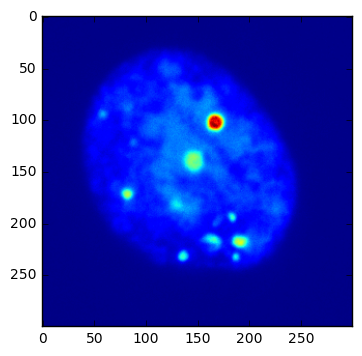

In [17]:
plt.imshow(GFP_zoom[8])

In [18]:
#Convert GFP_stack for blob_detection
GFP_zoom = GFP_zoom.astype(np.float64)

In [19]:
my_blobs_doh = blob_doh(GFP_zoom[8])

In [23]:
# Compute radii in the 3rd column.
my_blobs_doh[:, 2] = my_blobs_doh[:, 2] * sqrt(2)

In [24]:
my_blobs_doh[0]

array([  0.        ,  73.        ,  42.42640687])

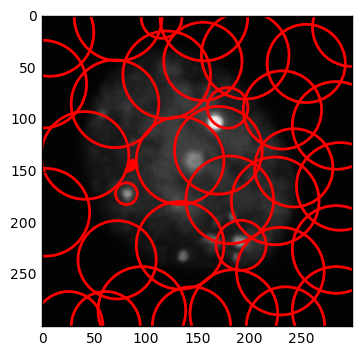

In [25]:
#Check approximation
fig, ax = plt.subplots()
ax.imshow(GFP_zoom[8], interpolation='nearest', cmap='gray')

for blob in my_blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

In [35]:
##This is better, but not good, but reducing the allowed overlap makes it worse
my_blobs_doh2 = blob_doh(GFP_zoom[8], max_sigma=10)

# Compute radii in the 3rd column.
my_blobs_doh2[:, 2] = my_blobs_doh2[:, 2] * sqrt(2)

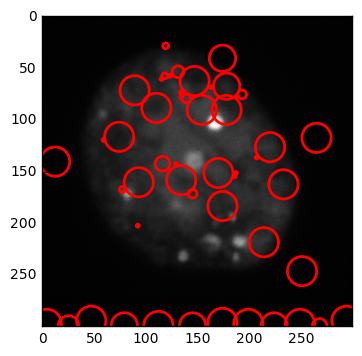

In [42]:
#Check approximation
fig, ax = plt.subplots()
ax.imshow(GFP_zoom[8], interpolation='nearest', cmap='gray')

for blob in my_blobs_doh2:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

In [43]:
my_blobs_dog = blob_doh(GFP_zoom[8])

# Compute radii in the 3rd column.
my_blobs_dog[:, 2] = my_blobs_dog[:, 2] * sqrt(2)

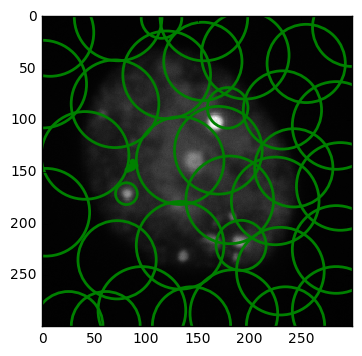

In [44]:
#Check approximation
fig, ax = plt.subplots()
ax.imshow(GFP_zoom[8], interpolation='nearest', cmap='gray')

for blob in my_blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='green', linewidth=2, fill=False)
    ax.add_patch(c)

In [47]:
my_blobs_log = blob_log(GFP_zoom[8], max_sigma=10)

# Compute radii in the 3rd column.
my_blobs_log[:, 2] = my_blobs_log[:, 2] * sqrt(2)

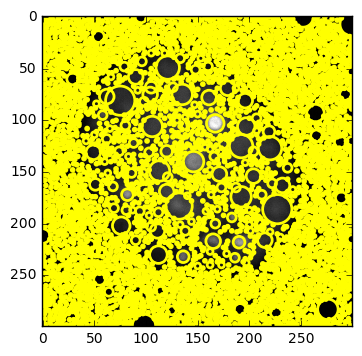

In [48]:
#Check approximation
fig, ax = plt.subplots()
ax.imshow(GFP_zoom[8], interpolation='nearest', cmap='gray')

for blob in my_blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax.add_patch(c)

Just needs increasing the minimum

In [ ]:
##Can it run on 3D stack? Not in this edition!
#my_blobs_doh3 = blob_doh(GFP_zoom, max_sigma=20, overlap=0.05)
blob_dog(GFP_zoom, max_sigma=20, overlap=0.05)